In [2]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing gsdmm.egg-info\PKG-INFO
writing dependency_links to gsdmm.egg-info\dependency_links.txt
writing requirements to gsdmm.egg-info\requires.txt
writing top-level names to gsdmm.egg-info\top_level.txt
reading manifest file 'gsdmm.egg-info\SOURCES.txt'
writing manifest file 'gsdmm.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\gsdmm
copying build\lib\gsdmm\mgp.py -> build\bdist.win-amd64\egg\gsdmm
copying build\lib\gsdmm\__init__.py -> build\bdist.win-amd64\egg\gsdmm
byte-compiling build\bdist.win-amd64\egg\gsdmm\mgp.py to mgp.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\gsdmm\__init__.py to __init__.cpython-38.pyc
creating build\bdist.win-amd64\egg\EGG-INFO
copying gsdmm.egg-info\PKG-INFO -> build\bdist.win-amd64\egg\EGG-INFO
copying gsdmm.egg-info\SOURCES.txt -> build\bdist.win-amd64\egg\

zip_safe flag not set; analyzing archive contents...


In [3]:
!python -m pip install -U gensim

Requirement already up-to-date: gensim in c:\users\hp\anaconda3\lib\site-packages (4.1.2)


In [4]:
 pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --user pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [7]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:

import numpy as np 
import pandas as pd

import sys

from gsdmm import MovieGroupProcess

from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora, models
from gensim.utils import simple_preprocess
import gensim, spacy
from gensim.models.ldamulticore import LdaMulticore
import re


from gensim.models import Phrases
from gensim.models.phrases import Phraser

import os



In [9]:
pip install jupyter_contrib_nbextensions

Note: you may need to restart the kernel to use updated packages.


In [10]:
!jupyter contrib nbextension install --user

[I 04:10:53 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 04:10:53 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 04:10:55 InstallContribNbextensionsApp] Installing c:\users\hp\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 04:10:55 InstallContribNbextensionsApp] Up to date: C:\Users\HP\AppData\Roaming\jupyter\nbextensions\addbefore\addbefore.yaml
[I 04:10:55 InstallContribNbextensionsApp] Up to date: C:\Users\HP\AppData\Roaming\jupyter\nbextensions\addbefore\icon.png
[I 04:10:55 InstallContribNbextensionsApp] Up to date: C:\Users\HP\AppData\Roaming\jupyter\nbextensions\addbefore\main.js
[I 04:10:55 InstallContribNbextensionsApp] Up to date: C:\Users\HP\AppData\Roaming\jupyter\nbextensions\addbefore\readme.md
[I 04:10:55 InstallContribNbextensionsApp] - Validating: ok
[I 04:10:55 InstallContribNbextensionsApp] Installing c:\users\hp\anac

In [11]:
!jupyter nbextension enable execute_time/ExecuteTime

Enabling notebook extension execute_time/ExecuteTime...
      - Validating: ok


In [12]:
# read the tweets info a dataframe
import pandas as pd
data = pd.read_csv('FBML_new_data.csv') #Facebook/Data/in/FBML_new_data.csv
data.head(2)

,altmetric_id,title,abstract,fb_wall_count,fb_wall_urls,shares,visibility,total_like,total_love,total_wow,...,new_fb_posts_list,title_length,fb_Vader_mean,fb_Vader_median,fb_TB_mean,fb_TB_median,fb_Vader_mean_class,fb_Vader_median_class,fb_TB_mean_class,fb_TB_median_class
0,16937763.0,risk ischemic stroke transient ischemic attack...,risk stroke cardiac carotid surgery well estab...,1,[{'link': 'https://www.facebook.com/permalink....,0,2096651,3,0,0,...,['new research published cerebrovascular disea...,91,0.0516,0.0516,0.1364,0.1364,1,1,1,1
1,31057208.0,understanding targeting uptake hiv testing amo...,assessed trends hiv testing outcomes period cl...,1,[{'link': 'https://www.facebook.com/permalink....,0,1662,3,0,0,...,[],97,0.0000,0.0000,0.4583,0.4583,0,0,1,1


In [13]:
data.describe()

,altmetric_id,fb_wall_count,shares,visibility,total_like,total_love,total_wow,total_haha,total_sad,total_angry,...,abstract_length,title_length,fb_Vader_mean,fb_Vader_median,fb_TB_mean,fb_TB_median,fb_Vader_mean_class,fb_Vader_median_class,fb_TB_mean_class,fb_TB_median_class
count,5.317000e+04,53170.000000,53170.000000,5.317000e+04,53170.000000,53170.000000,53170.000000,53170.000000,53170.000000,53170.000000,...,53170.000000,53170.000000,53170.000000,53170.000000,53170.000000,53170.000000,53170.000000,53170.000000,53170.000000,53170.000000
mean,2.223927e+07,2.067369,9.560466,1.502669e+04,27.409517,0.863588,0.612846,0.112545,0.155783,0.089787,...,1432.845872,99.396107,0.072266,0.072001,0.076284,0.074566,0.131014,0.127083,0.375230,0.362385
std,5.042935e+06,7.885439,56.731656,1.425582e+05,273.029007,7.653081,6.877598,6.104753,4.188986,3.334108,...,562.897452,36.541013,0.394842,0.399832,0.155681,0.156189,0.692063,0.683682,0.647694,0.638611
min,8.562670e+05,1.000000,0.000000,-1.480000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,-0.999900,-0.999900,-0.850000,-0.850000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.836128e+07,1.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1079.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.136877e+07,1.000000,0.000000,-1.000000e+00,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1437.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.650382e+07,2.000000,4.000000,1.219750e+03,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1715.000000,121.000000,0.266431,0.273200,0.136400,0.134600,1.000000,1.000000,1.000000,1.000000
max,4.379679e+07,1691.000000,6448.000000,1.497699e+07,45558.000000,646.000000,748.000000,910.000000,733.000000,520.000000,...,7693.000000,874.000000,0.999700,0.999700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53170 entries, 0 to 53169
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   altmetric_id           53170 non-null  float64
 1   title                  53170 non-null  object 
 2   abstract               53170 non-null  object 
 3   fb_wall_count          53170 non-null  int64  
 4   fb_wall_urls           53170 non-null  object 
 5   shares                 53170 non-null  int64  
 6   visibility             53170 non-null  int64  
 7   total_like             53170 non-null  int64  
 8   total_love             53170 non-null  int64  
 9   total_wow              53170 non-null  int64  
 10  total_haha             53170 non-null  int64  
 11  total_sad              53170 non-null  int64  
 12  total_angry            53170 non-null  int64  
 13  author_count           53170 non-null  float64
 14  fb_posts               53170 non-null  object 
 15  fb

In [15]:
#data['length'] = fb_data.fb_posts_processed.apply(lambda row: len(row.split()))
#print('Mean length: ', fb_data['length'].mean())

In [16]:
import re

unique_posts=data.fb_posts_processed.unique()
new_list=unique_posts.tolist()
fb_data=pd.DataFrame({'Fb_post': unique_posts}) #new dataframe and column

for i in range(fb_data['Fb_post'].count()):
    fb_data.at[i,'Fb_post'] = re.sub(r'[^a-zA-Z ]',r'',fb_data['Fb_post'][i])

In [17]:
fb_data['length']=fb_data.Fb_post.str.len() # new column

fb_data.sort_values(by=['length'], inplace=True)

fb_data=fb_data.drop_duplicates()
 #data1.head(10)
data1=fb_data[(fb_data["length"]<=1200) | (fb_data["length"]>=30000)]
fb_data=fb_data.drop(data1.index)
fb_data.head(5)

#fb_data['length'].min()

# new_fb_data=fb_data.drop_duplicates()
# #data1.head(10)

# data1=new_fb_data[(new_fb_data["length"]<=1200) | (new_fb_data["length"]>=30000)]
# new_fb_data=new_fb_data.drop(data1.index)
# new_fb_data.head(5)

,Fb_post,length
36776,Unusual course of generalized lymph node prima...,1201
32682,Cep in Med left and high right expression in c...,1201
18195,There is no evidence to support that vitamin D...,1201
14396,Research Tuesday This followup study examined ...,1201
11279,Metaanalysis Tea is surprisingly good for your...,1201


In [18]:
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5174 entries, 36776 to 31973
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Fb_post  5174 non-null   object
 1   length   5174 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 121.3+ KB


In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

<AxesSubplot:xlabel='length', ylabel='Density'>

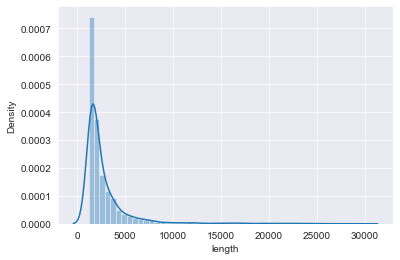

In [20]:
import seaborn as sns
sns.set_style(style="darkgrid")

sns.distplot(fb_data['length'])

In [21]:
fb_data['Fb_post'] = fb_data.Fb_post.values.tolist()

# remove characters
fb_data['Fb_post'] = [re.sub('\s+', ' ', sent) for sent in fb_data['Fb_post']]
fb_data['Fb_post'] = [re.sub("\'", "", sent) for sent in fb_data['Fb_post']]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [22]:
# create N-grams
def make_n_grams(texts):
    bigram = gensim.models.Phrases(texts, min_count=5, threshold=100)  # higher threshold fewer phrases.
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(bigram[texts], threshold=100)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    bigrams_text = [bigram_mod[doc] for doc in texts]
    trigrams_text =  [trigram_mod[bigram_mod[doc]] for doc in bigrams_text]
    return trigrams_text

In [23]:

tokens_posts = list(sent_to_words(fb_data['Fb_post']))

In [24]:
tokens_posts = make_n_grams(tokens_posts)

In [25]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# I use gensim stop-words and add me own stop-words, based on texts
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in gensim.parsing.preprocessing.STOPWORDS.union(set(['also', 'meanwhile','however', 
                                                                                                                           'there',  'soooo', 'study']))] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [26]:
# do lemmatization keeping only noun, vb, adv
# because adj is not informative for reviews topic modeling
posts_lemmatized = lemmatization(tokens_posts, allowed_postags=['NOUN', 'VERB', 'ADV'])

# remove stop words after lemmatization
posts_lemmatized = remove_stopwords(posts_lemmatized)

In [27]:
np.random.seed(0)

In [28]:
mgp = MovieGroupProcess(K=6, alpha=0.01, beta=0.01, n_iters=20)

vocab = set(x for review in posts_lemmatized for x in review)
n_terms = len(vocab)
model = mgp.fit(posts_lemmatized, n_terms)

In stage 0: transferred 4252 clusters with 6 clusters populated
In stage 1: transferred 876 clusters with 6 clusters populated
In stage 2: transferred 194 clusters with 6 clusters populated
In stage 3: transferred 87 clusters with 6 clusters populated
In stage 4: transferred 36 clusters with 6 clusters populated
In stage 5: transferred 30 clusters with 6 clusters populated
In stage 6: transferred 20 clusters with 6 clusters populated
In stage 7: transferred 10 clusters with 6 clusters populated
In stage 8: transferred 7 clusters with 6 clusters populated
In stage 9: transferred 8 clusters with 6 clusters populated
In stage 10: transferred 2 clusters with 6 clusters populated
In stage 11: transferred 0 clusters with 6 clusters populated
In stage 12: transferred 1 clusters with 6 clusters populated
In stage 13: transferred 0 clusters with 6 clusters populated
In stage 14: transferred 0 clusters with 6 clusters populated
In stage 15: transferred 1 clusters with 6 clusters populated
In sta

In [30]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster,sort_dicts))

In [31]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print('\nMost important clusters (by number of docs inside):', top_index)
# show the top 5 words in term frequency for each cluster 
top_words(mgp.cluster_word_distribution, top_index, 10)

Number of documents per topic : [  17   15  121    8   26 4987]

Most important clusters (by number of docs inside): [5 2 4 0 1 3]

Cluster 5 : [('use', 8360), ('patient', 7125), ('risk', 4741), ('increase', 4646), ('result', 4339), ('health', 4179), ('treatment', 3970), ('effect', 3963), ('research', 3849), ('cell', 3589)]

Cluster 2 : [('patient', 342), ('risk', 186), ('associate', 148), ('treatment', 129), ('year', 115), ('use', 113), ('group', 98), ('hypertension', 93), ('increase', 89), ('level', 78)]

Cluster 4 : [('result', 68), ('child', 67), ('page', 54), ('pubme', 36), ('medicine', 27), ('outcome', 27), ('department', 26), ('faculty', 26), ('analysis', 24), ('patient', 23)]

Cluster 0 : [('til', 19), ('publication', 17), ('cell', 16), ('protein', 11), ('disease', 9), ('sharan', 8), ('response', 7), ('therapy', 7), ('hyphessobrycon', 7), ('host', 6)]

Cluster 1 : [('page', 144), ('child', 89), ('outcome', 30), ('patient', 27), ('disease', 25), ('review', 22), ('factor', 21), (

In [32]:
# I don`t rename the clusters

topic_dict = {}
topic_names = ['type 1',
               'type 2',
               'type 3',
               'type 4',
               'type 5',
               'type 6',
              ]
for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topic_names[i] 

In [33]:
fb_data.head(2)

,Fb_post,length
36776,Unusual course of generalized lymph node prima...,1201
32682,Cep in Med left and high right expression in c...,1201


In [34]:
def create_topics_dataframe(data_text=fb_data.Fb_post,  mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=posts_lemmatized):
    result = pd.DataFrame(columns=['Text', 'Topic', 'post_length', 'Lemma-text'])
    for i, text in enumerate(data_text):
        result.at[i, 'Text'] = text
        result.at[i, 'post_length'] = len(text)#fb_data.Fb_post[i]
        result.at[i, 'Lemma-text'] = lemma_text[i]
        prob = mgp.choose_best_label(posts_lemmatized[i])
        if prob[1] >= threshold:
            result.at[i, 'Topic'] = topic_dict[prob[0]]
        else:
            result.at[i, 'Topic'] = 'Other'
    return result

In [35]:
result = create_topics_dataframe(data_text=fb_data.Fb_post, mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=posts_lemmatized)
result.head(5)

,Text,Topic,post_length,Lemma-text
0,Unusual course of generalized lymph node prima...,type 1,1199,"[course, generalize, lymph_node, plasmacytoma,..."
1,Cep in Med left and high right expression in c...,type 1,1192,"[cep, expression, cancer, tissue, discovery, p..."
2,There is no evidence to support that vitamin D...,type 2,1174,"[evidence, support, significantly, benefit, pc..."
3,Research Tuesday This followup study examined ...,type 1,1195,"[research, followup, examine, parent, interven..."
4,Metaanalysis Tea is surprisingly good for your...,type 1,1181,"[metaanalysis, tea, surprisingly, bone, health..."


In [36]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5174 entries, 0 to 5173
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Text         5174 non-null   object
 1   Topic        5174 non-null   object
 2   post_length  5174 non-null   object
 3   Lemma-text   5174 non-null   object
dtypes: object(4)
memory usage: 331.1+ KB


# LDA visualization

In [37]:
#pip install plotly

In [38]:
# import plotly.express as px

# fig = px.pie(result, names='Topic',  title='Topics', color_discrete_sequence=px.colors.sequential.Burg)
# fig.show()

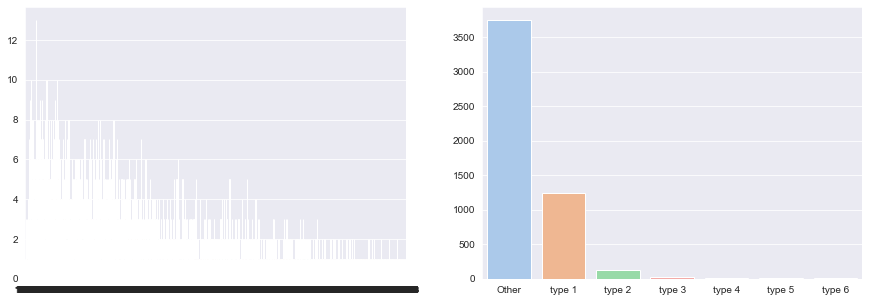

In [39]:
import matplotlib.pyplot as plt

post_counts = result.post_length.value_counts()
types_counts = result.Topic.value_counts()
fig, ax = plt.subplots(1, 2, figsize=(15,5))
post = sns.barplot(x = post_counts.index, y = post_counts.values, palette="pastel", ax=ax[0])
types = sns.barplot(x = types_counts.index, y = types_counts.values, palette="pastel", ax=ax[1])

In [40]:
# fig = px.sunburst(result, path=['Topic', 'fb_post'], title='Topics and FB_post', color_discrete_sequence=px.colors.sequential.Burg)
# fig.show()

In [41]:
result['len'] = result.Text.apply(lambda row: len(row.split()))
result.head()

,Text,Topic,post_length,Lemma-text,len
0,Unusual course of generalized lymph node prima...,type 1,1199,"[course, generalize, lymph_node, plasmacytoma,...",177
1,Cep in Med left and high right expression in c...,type 1,1192,"[cep, expression, cancer, tissue, discovery, p...",186
2,There is no evidence to support that vitamin D...,type 2,1174,"[evidence, support, significantly, benefit, pc...",188
3,Research Tuesday This followup study examined ...,type 1,1195,"[research, followup, examine, parent, interven...",165
4,Metaanalysis Tea is surprisingly good for your...,type 1,1181,"[metaanalysis, tea, surprisingly, bone, health...",171


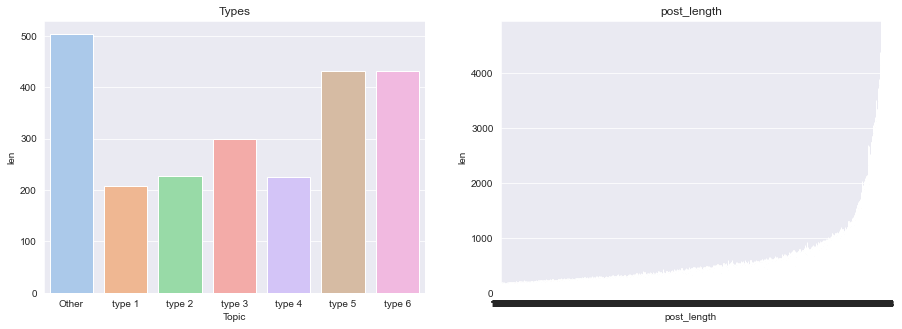

In [42]:
types_len = result.groupby(by=['Topic']).mean()
post_len = result.groupby(by=['post_length']).mean()
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('Types')
ax[1].set_title('post_length')
types = sns.barplot(x = types_len.index, y = types_len['len'], palette="pastel",  ax=ax[0])
post = sns.barplot(x = post_len.index, y = post_len['len'], palette="pastel", ax=ax[1])

In [44]:
result.post_length = pd.to_numeric(result.post_length)

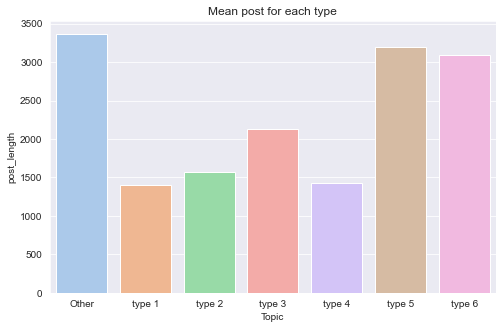

In [45]:
types_post = result.drop('len', axis='columns').groupby(by=['Topic']).mean()
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Mean post for each type')
types = sns.barplot(x = types_post.index, y = types_post.post_length, palette="pastel")

# Word Clouds

In [46]:
result['Lemma_text'] = result['Lemma-text'].apply(lambda row: ' '.join(row))

In [47]:
result = result.drop('Lemma-text', axis=1)

In [48]:
from wordcloud import WordCloud 

In [49]:
def create_WordCloud(data, title=None):
    wordcloud = WordCloud(width = 500, height = 500,
                          background_color ='white',
                          min_font_size = 15
                         ).generate(" ".join(data.values))
                      
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=20)
    plt.show() 

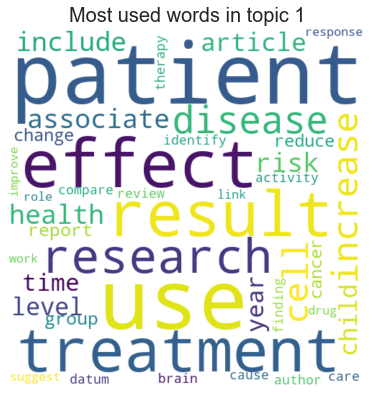

In [50]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 1'], title="Most used words in topic 1")

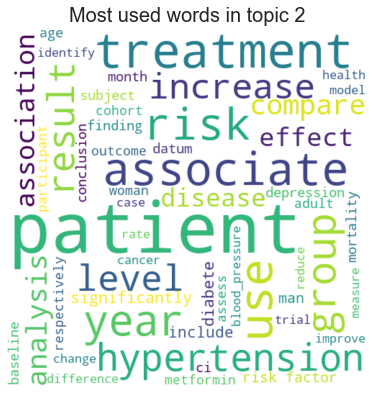

In [51]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 2'], title="Most used words in topic 2")

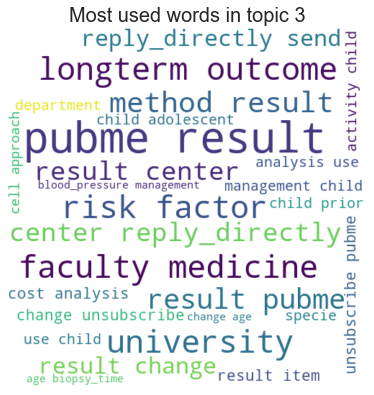

In [52]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 3'], title="Most used words in topic 3")

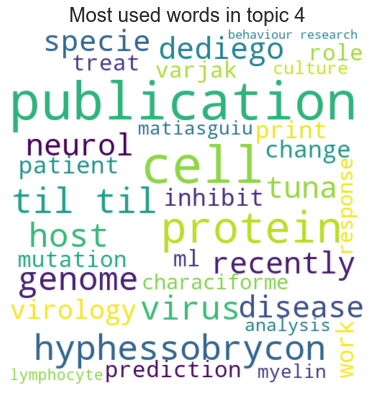

In [53]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 4'], title="Most used words in topic 4")

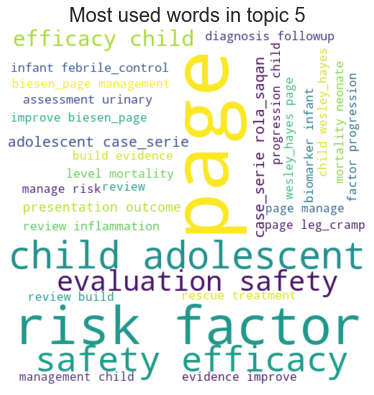

In [54]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 5'], title="Most used words in topic 5")

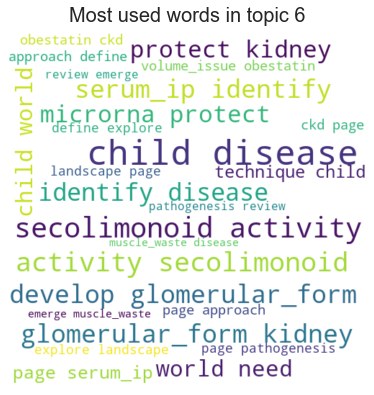

In [55]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 6'], title="Most used words in topic 6")

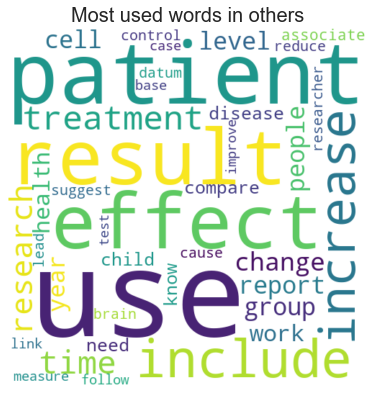

In [58]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'Other'], title="Most used words in others")

# LDA

In [59]:
id2word = corpora.Dictionary(posts_lemmatized)
texts = posts_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [60]:
# Use TF-IDF
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [63]:
from gensim.models.ldamulticore import LdaMulticore

def calc_coherence_values(dictionary, corpus, texts, limit = 12, start = 1, step = 1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus,id2word = dictionary, num_topics = num_topics, alpha=.1, eta=0.1, random_state = 42)
        model_list.append(model)
        print('model created')
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        print(coherencemodel.get_coherence())
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = calc_coherence_values(dictionary = id2word, corpus = corpus_tfidf, texts = texts, start = 20, limit = 30, step = 2)

model created
0.3218928590525274
model created
0.32668128856185297
model created
0.3244949498686523
model created
0.32965973810140975
model created
0.31841254174297723


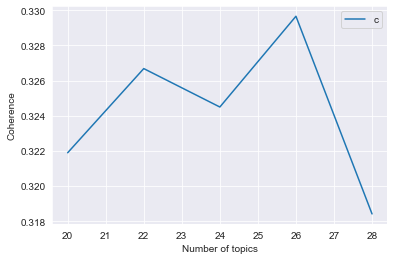

In [64]:
import matplotlib.pyplot as plt

limit, start, step = 30, 20, 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [65]:
index = coherence_values.index(max(coherence_values))
model_list[index].show_topics()

[(0,
  '0.001*"cell" + 0.001*"patient" + 0.001*"brain" + 0.001*"risk" + 0.000*"drug" + 0.000*"sleep" + 0.000*"health" + 0.000*"cancer" + 0.000*"treatment" + 0.000*"use"'),
 (4,
  '0.001*"patient" + 0.001*"child" + 0.000*"epilepsy" + 0.000*"risk" + 0.000*"cancer" + 0.000*"brain" + 0.000*"time" + 0.000*"intervention" + 0.000*"health" + 0.000*"woman"'),
 (23,
  '0.001*"patient" + 0.001*"treatment" + 0.000*"group" + 0.000*"disease" + 0.000*"pain" + 0.000*"woman" + 0.000*"child" + 0.000*"cell" + 0.000*"effect" + 0.000*"risk"'),
 (21,
  '0.001*"patient" + 0.001*"protein" + 0.001*"page" + 0.001*"brain" + 0.000*"cell" + 0.000*"treatment" + 0.000*"disease" + 0.000*"risk" + 0.000*"pain" + 0.000*"cancer"'),
 (20,
  '0.001*"patient" + 0.001*"risk" + 0.001*"vitamin" + 0.001*"health" + 0.001*"care" + 0.001*"treatment" + 0.000*"woman" + 0.000*"cell" + 0.000*"cancer" + 0.000*"child"'),
 (3,
  '0.001*"patient" + 0.001*"cell" + 0.001*"risk" + 0.000*"brain" + 0.000*"child" + 0.000*"group" + 0.000*"increa

In [68]:

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [69]:
import pyLDAvis
import pyLDAvis.gensim_models

lda_display = pyLDAvis.gensim_models.prepare(model_list[index], corpus_tfidf, id2word, sort_topics = False)
pyLDAvis.display(lda_display)


# import pyLDAvis
# import pyLDAvis.gensim_models

# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)
# vis



In [70]:
def format_topics_sentences(lda_model, corpus, fb_data):
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(lda_model[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [72]:
df_topic_sents_keywords = format_topics_sentences(model_list[index], corpus_tfidf, texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.7053,"child, patient, risk, liver, disease, increase...","[course, generalize, lymph_node, plasmacytoma,..."
1,1,25.0,0.5687,"patient, risk, cell, health, group, effect, in...","[cep, expression, cancer, tissue, discovery, p..."
2,2,8.0,0.6929,"patient, risk, cell, disease, brain, increase,...","[evidence, support, significantly, benefit, pc..."
3,3,22.0,0.6579,"patient, page, risk, brain, treatment, child, ...","[research, followup, examine, parent, interven..."
4,4,18.0,0.6534,"cancer, patient, cell, pain, disease, health, ...","[metaanalysis, tea, surprisingly, bone, health..."
5,5,4.0,0.6405,"patient, child, epilepsy, risk, cancer, brain,...","[compare, cloth, bouffant, permeability, parti..."
6,6,18.0,0.6676,"cancer, patient, cell, pain, disease, health, ...","[series, experiment, student, read, article, o..."
7,7,25.0,0.6985,"patient, risk, cell, health, group, effect, in...","[swim, white, threat, ambush, shark, raise, le..."
8,8,18.0,0.6613,"cancer, patient, cell, pain, disease, health, ...","[year, unfortunately, player, sustain, season,..."
9,9,13.0,0.7237,"child, patient, und, cell, treatment, training...","[lancet, change, month, child, mortality, auth..."


In [73]:
topic_counts = df_dominant_topic.Dominant_Topic.value_counts().sort_values(ascending=True)

In [77]:
# plt.figure(figsize=(20,5))
# ax = sns.barplot(x=topic_counts.index, y=topic_counts, data=topic_counts,  palette="ch:.25")
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points')
# ax = ax.set_xticklabels(topic_counts.index, rotation = 45, ha="right")



In [78]:
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], axis=0)

sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]
sent_topics_sorteddf_mallet.head(24)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.7871,"cell, patient, brain, risk, drug, sleep, healt...","[today, announcement, head, jersey, leave, ser..."
1,1.0,0.7963,"patient, disease, health, child, treatment, dr...","[animal_model, strongly, suggest, role, gut_mi..."
2,2.0,0.7885,"patient, sleep, cell, risk, vitamin, child, he...","[happen, afe, mention, case, report, transesop..."
3,3.0,0.7991,"patient, cell, risk, brain, child, group, incr...","[potential, land, base, carbon, mitigation, to..."
4,4.0,0.7680,"patient, child, epilepsy, risk, cancer, brain,...","[meet, investigator, dermatology, school, medi..."
5,5.0,0.7651,"child, patient, risk, liver, disease, increase...","[diyenlere, blast, biyopsilerinde, farkl, merk..."
6,6.0,0.7757,"risk, patient, health, treatment, group, pain,...","[continue, prescription, reaction, associate, ..."
7,7.0,0.7850,"patient, cell, risk, treatment, use, cancer, c...","[stick, option, collapse, quantum, mystery, so..."
8,8.0,0.7967,"patient, risk, cell, disease, brain, increase,...","[thr, research, policy, nicotine, hold, presen..."
9,9.0,0.8096,"child, patient, risk, care, treatment, page, h...","[ucla, newsroom, year, outbreak, survivor, sig..."
